NumPy version: 2.2.6
All libraries imported successfully!
Dataset shape: (178, 14)

Feature names: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']

Target names: ['class_0' 'class_1' 'class_2']

First 5 rows of the dataset:
   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1

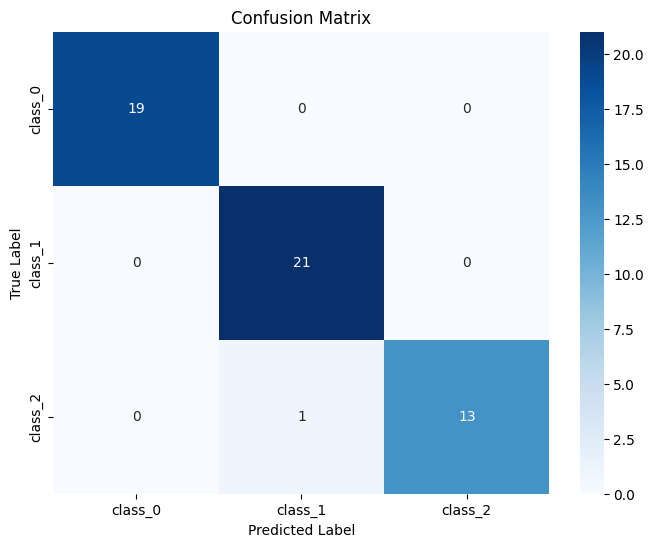

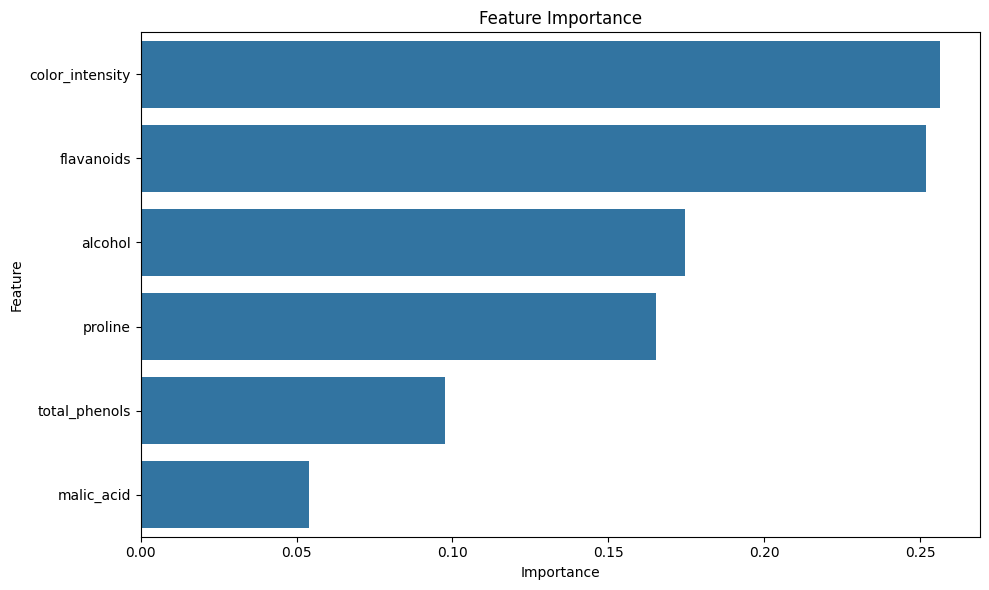


Feature Importance:
           Feature  Importance
4  color_intensity    0.256417
3       flavanoids    0.251900
0          alcohol    0.174702
5          proline    0.165202
2    total_phenols    0.097716
1       malic_acid    0.054063

Model, scaler, and selected features saved successfully!


In [5]:
# Cell 1: Import necessary libraries with error handling
try:
    import numpy as np
    import pandas as pd
    from sklearn.datasets import load_wine
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import StandardScaler
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
    import joblib
    import matplotlib.pyplot as plt
    import seaborn as sns
    import warnings
    warnings.filterwarnings('ignore')

    # Print versions for debugging
    print(f"NumPy version: {np.__version__}")
    print("All libraries imported successfully!")
except ImportError as e:
    print(f"Import error: {e}")
    print("Please ensure all required packages are installed with compatible versions.")

# Cell 2: Load and explore the dataset
# Load the wine dataset
wine = load_wine()
X = wine.data
y = wine.target

# Create a DataFrame for better visualization
df = pd.DataFrame(X, columns=wine.feature_names)
df['cultivar'] = y

# Display basic information about the dataset
print("Dataset shape:", df.shape)
print("\nFeature names:", wine.feature_names)
print("\nTarget names:", wine.target_names)
print("\nFirst 5 rows of the dataset:")
print(df.head())

# Cell 3: Feature Selection
# Select 6 features for the model (you can change these)
selected_features = [
    'alcohol',
    'malic_acid',
    'total_phenols',
    'flavanoids',
    'color_intensity',
    'proline'
]

# Extract selected features and target
X_selected = df[selected_features]
y = df['cultivar']

print("Selected features:", selected_features)
print("\nShape of selected features:", X_selected.shape)

# Cell 4: Data Preprocessing
# Check for missing values
print("Missing values in each column:")
print(X_selected.isnull().sum())

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.3, random_state=42
)

print(f"\nTraining set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Cell 5: Model Training
# Initialize and train the Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Cell 6: Model Evaluation
# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

# Generate classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=wine.target_names))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=wine.target_names,
            yticklabels=wine.target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.savefig('confusion_matrix.png')
plt.show()

# Cell 7: Feature Importance
# Get feature importance from the model
feature_importance = model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': selected_features,
    'Importance': feature_importance
}).sort_values('Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.tight_layout()
plt.savefig('feature_importance.png')
plt.show()

print("\nFeature Importance:")
print(feature_importance_df)

# Cell 8: Save the Model and Scaler
# Save the trained model to the correct path
joblib.dump(model, '../model/wine_cultivar_model.pkl')

# Save the scaler for use in the web application
joblib.dump(scaler, '../model/scaler.pkl')

# Save the selected features list
joblib.dump(selected_features, '../model/selected_features.pkl')

print("\nModel, scaler, and selected features saved successfully!")